# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | thinadhoo
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | daru
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | acarau
Processing Record 7 of Set 1 | podporozh'ye
Processing Record 8 of Set 1 | cabedelo
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | galliano
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | rongelap
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | lhasa
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | rikaze
Processing Record 18 of Set 1 | kabwe
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | san antonio de pale
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | colonia
Processing Record 23 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,305.64,71,0,3.09,US,1721072836
1,thinadhoo,0.5333,72.9333,302.12,73,100,2.92,MV,1721072838
2,ribeira grande,38.5167,-28.7000,297.47,88,40,5.66,PT,1721072839
3,daru,-9.0763,143.2092,296.65,76,100,2.88,PG,1721072841
4,port-aux-francais,-49.3500,70.2167,275.03,76,83,14.83,TF,1721072843


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,305.64,71,0,3.09,US,1721072836
1,thinadhoo,0.5333,72.9333,302.12,73,100,2.92,MV,1721072838
2,ribeira grande,38.5167,-28.7000,297.47,88,40,5.66,PT,1721072839
3,daru,-9.0763,143.2092,296.65,76,100,2.88,PG,1721072841
4,port-aux-francais,-49.3500,70.2167,275.03,76,83,14.83,TF,1721072843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

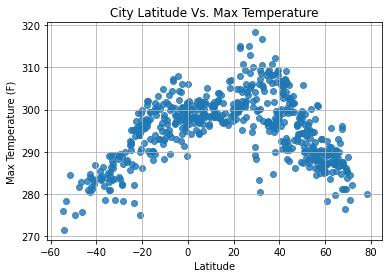

In [14]:
city_data_df = pd.DataFrame(city_data)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

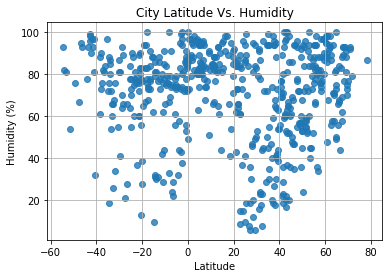

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,humidity, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

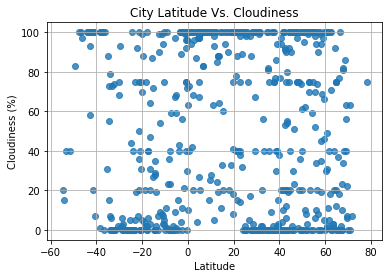

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

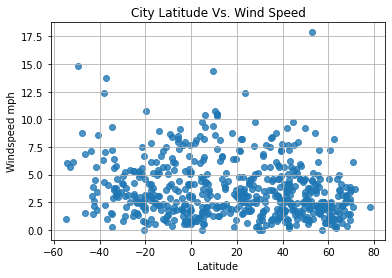

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2)) 

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values)

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,305.64,71,0,3.09,US,1721072836
1,thinadhoo,0.5333,72.9333,302.12,73,100,2.92,MV,1721072838
2,ribeira grande,38.5167,-28.7000,297.47,88,40,5.66,PT,1721072839
6,podporozh'ye,60.9112,34.1706,287.15,98,2,2.13,RU,1721072846
9,galliano,29.4422,-90.2992,304.15,84,40,0.00,US,1721072851


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,daru,-9.0763,143.2092,296.65,76,100,2.88,PG,1721072841
4,port-aux-francais,-49.3500,70.2167,275.03,76,83,14.83,TF,1721072843
5,acarau,-2.8856,-40.1200,300.04,73,4,7.95,BR,1721072844
7,cabedelo,-6.9811,-34.8339,300.52,75,0,6.04,BR,1721072848
8,bredasdorp,-34.5322,20.0403,282.84,88,55,0.30,ZA,1721072849


###  Temperature vs. Latitude Linear Regression Plot

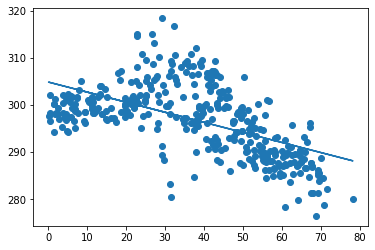

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_df ["Lat"]
y_values = northern_df ["Max Temp"]
plt.savefig("output_data/Fig5.png")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))
plt.show()

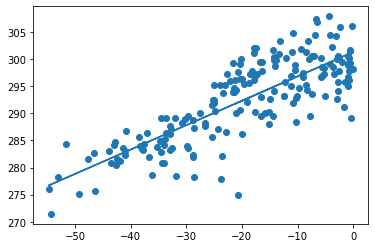

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_df ["Lat"]
y_values = southern_df ["Max Temp"]
plt.savefig("output_data/Fig6.png")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

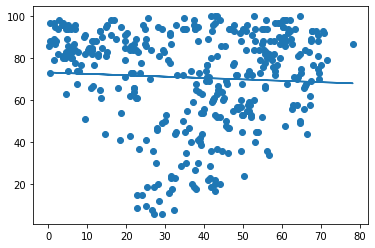

In [45]:
# Northern Hemisphere
x_values = northern_df ["Lat"]
y_values = northern_df ["Humidity"]
plt.savefig("output_data/Fig7.png")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

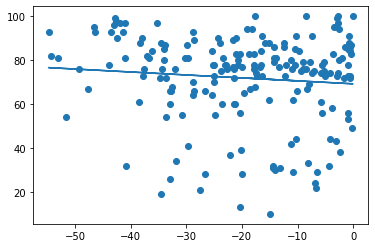

In [46]:
# Southern Hemisphere
x_values = southern_df ["Lat"]
y_values = southern_df ["Humidity"]
plt.savefig("output_data/Fig8.png")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

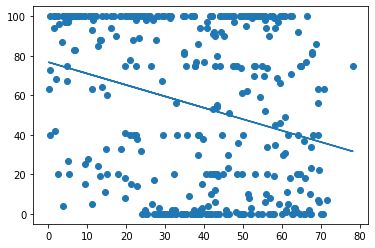

In [47]:
# Northern Hemisphere
x_values = northern_df ["Lat"]
y_values = northern_df ["Cloudiness"]
plt.savefig("output_data/Fig9.png")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

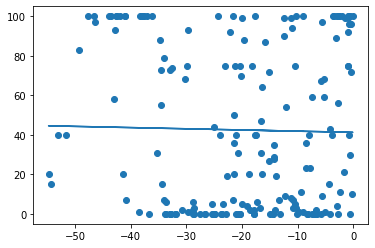

In [48]:
# Southern Hemisphere
x_values = southern_df ["Lat"]
y_values = southern_df ["Cloudiness"]
plt.savefig("output_data/Fig10.png")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

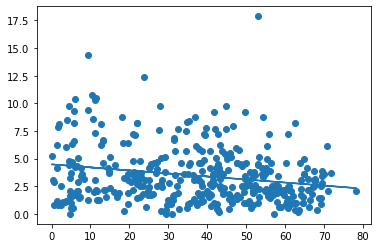

In [49]:
# Northern Hemisphere
x_values = northern_df ["Lat"]
y_values = northern_df ["Wind Speed"]
plt.savefig("output_data/Fig11.png")
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

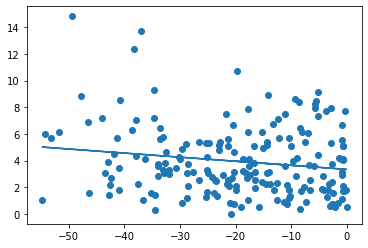

In [50]:
# Southern Hemisphere
x_values = southern_df ["Lat"]
y_values = southern_df ["Wind Speed"]
plt.savefig("output_data/Fig12.png")
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))